In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
from interfacePlots import *
from config import cfg
LOGGERDEFINED = fp.openLog('interfacemetrics_viscsweep.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

In [4]:
EFOLDERS = [os.path.join(cfg.path.server, 'yieldingsweep','HBHByielded',  s) for s in ['k', 'n', 'tau0']]
EXPORTFOLDER = os.path.join(cfg.path.fig, 'yieldingsweep', 'plots')

# Generating files

In [13]:
import pandas as pd
o = []
for topfolder in EFOLDERS:
    for f in os.listdir(topfolder):
        ffull = os.path.join(topfolder, f)
        try:
            fs.populate(ffull)
        except:
            pass
        else:
            l = fp.legendUnique(ffull)
            if len(l)>0:
                o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'yieldingsweep','yielding_legend_general.csv'))

In [138]:
for topfolder in EFOLDERS:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str
ERROR:root:list indices must be integers or slices, not str


In [215]:
intm.sumAndSteady(os.path.join(cfg.path.server, 'yieldingsweep', 'HBHByielded', 'n', 'nb1035'), True)

# Plots

`('nuink', 'tau0ink', 'kink', 'nink', 'nusup', 'tau0sup', 'ksup', 'nsup', 'sigma')`

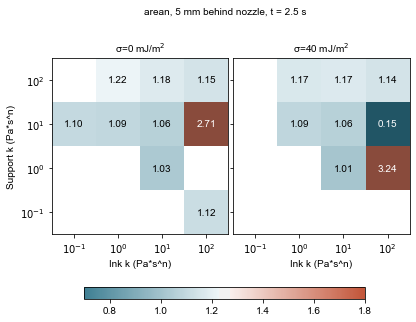

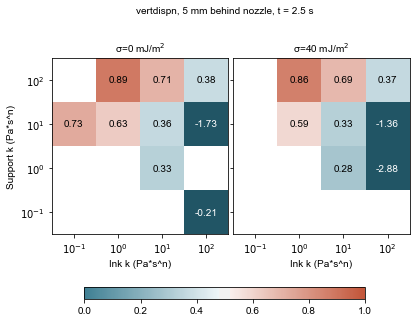

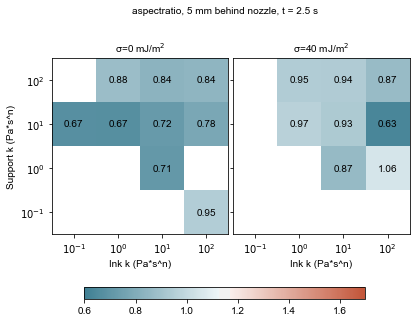

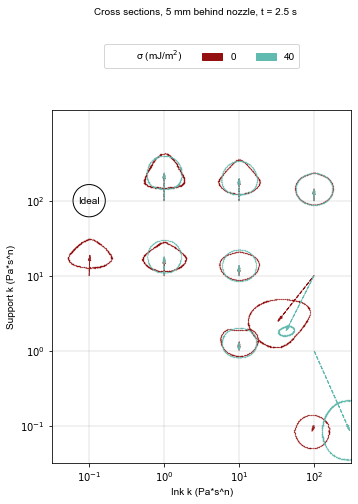

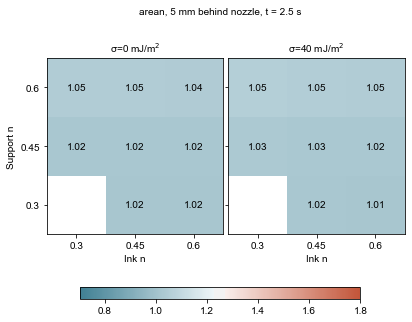

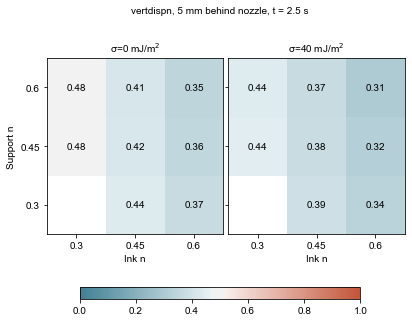

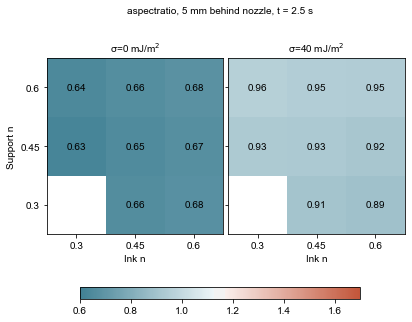

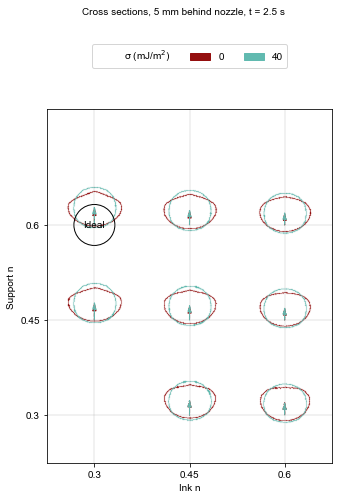

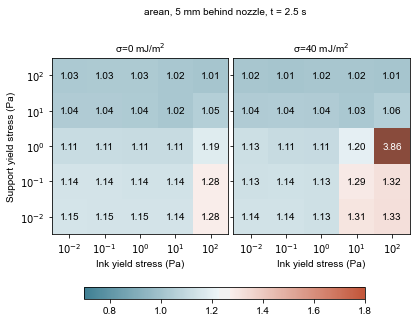

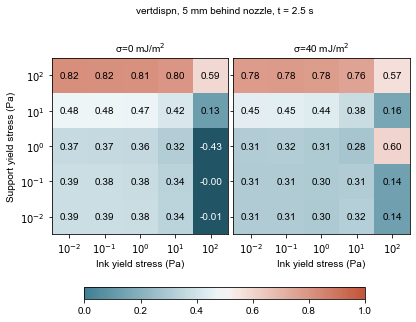

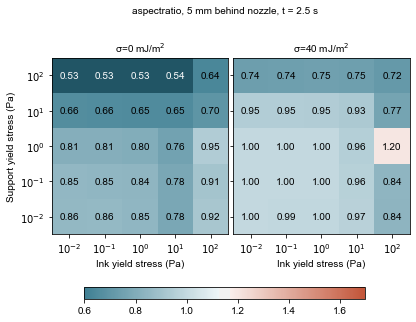

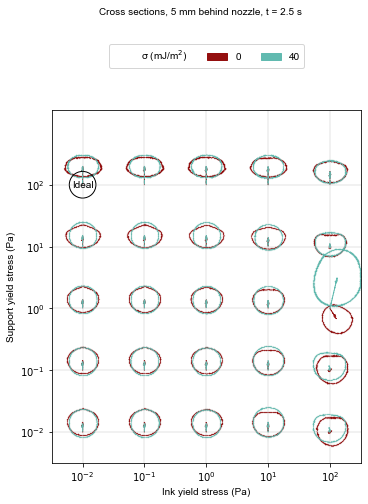

In [218]:
lists = [[10**-1, 10**0, 10**1, 10**2], [0.3, 0.45, 0.6], [10**-2, 10**-1, 10**0, 10**1, 10**2]]

for i, TOPFOLDER in enumerate(EFOLDERS):
    bn = os.path.basename(TOPFOLDER)
    xvar = bn+'ink'
    yvar = bn+'sup'
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    kwargs = {bn+'suplist':lists[i], bn+'inklist':lists[i]}    
    xposition = 5
    for t in [2.5]:
        for s in [['arean', 0.7, 1.8], ['vertdispn', 0, 1], ['aspectratio', 0.6, 1.7], ['speeddecay', 0.5, 1.0]]:
            metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar=xvar, yvar=yvar, split=True,\
                        sigmalist=[0,40], overwrite=True, tmin=s[1], tmax=s[2], adjustBounds=False, **kwargs)
            
    for t in [1, 2.5]:
        for sigma in [0, 40]:
            for ta in ['y_umag', 'y_viscy', 'y_uslicey', 'x_uslicex', 'x_viscx', 'y_shearRate']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar,\
                          overwrite=False, adjustBounds=False, **kwargs)
    
    for t in [2.5]:
        xposition = 5
        XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, [0, 40], xvar=xvar, yvar=yvar,\
                 overwrite=True, adjustBounds=False, **kwargs)
    
    for sigma in [0, 40]:
        imsize=1.3
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar,\
                    overwrite=False, adjustBounds=False, **kwargs)

In [ ]:
import pandas as pd
metrics = []
for TOPFOLDER in EFOLDERS:
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
df = pd.DataFrame(metrics)
df

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3,sharex='col', sharey='row',figsize=(6.5,6.5))
cmap = plt.get_cmap('tab20c')

for t in range(len(EFOLDERS)):
    TOPFOLDER = EFOLDERS[t]
    metrics = []
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
    df = pd.DataFrame(metrics)

    df2 = df[df['arean']<3]
    df2 = df2[df2['vertdispn']>-0.1]
    df2 = df2[df2['vertdispn']<1.2]
    df2 = df2[df2['speeddecay']<1.1]

    slist = df.keys()
    for i in range(4):
        for j in range(i):
            color = cmap(t/3)
            if j==0 and i==1:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color, label=os.path.basename(TOPFOLDER))
            else:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color)
            axs[j,i-1].set_xlabel(slist[i])
            axs[j,i-1].set_ylabel(slist[j])
axs[0,0].legend()


In [5]:
EFOLDERS

['//cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\\yieldingsweep\\HBHByielded\\k',
 '//cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\\yieldingsweep\\HBHByielded\\n',
 '//cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\\yieldingsweep\\HBHByielded\\tau0']

In [20]:
t1,units = intm.importLine(os.path.join(EFOLDERS[0], 'nb1018'), 1, x=1.4)

In [23]:
[np.linalg.norm(np.array([[row['shearrate0'],row['shearrate1'],row['shearrate2']],[row['shearrate3'],row['shearrate4'],row['shearrate5']],[row['shearrate6'],row['shearrate7'],row['shearrate8']]])) for i,row in t1.iterrows()]

[8.427211124050707,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0003802279949780132,
 0.00019460157428947402,
 0.00019460157428947402,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.00018753843652054368,
 0.0003802279949780132,
 0.00018753843652054368,
 0.0003802279949780132,
 0.0003802279949780132,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.0014894740760100526,
 0.

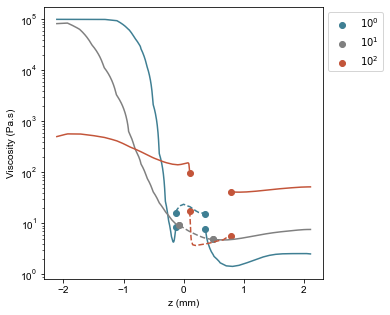

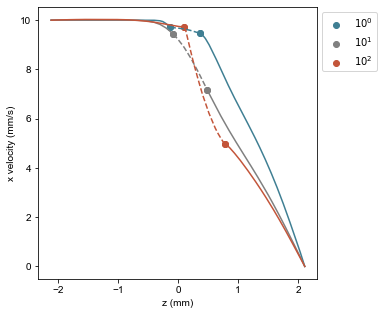

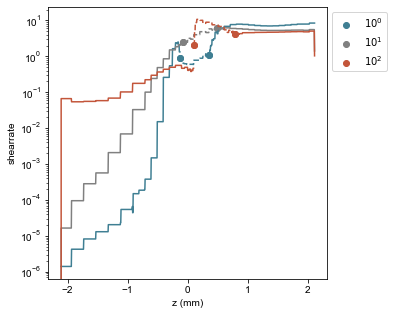

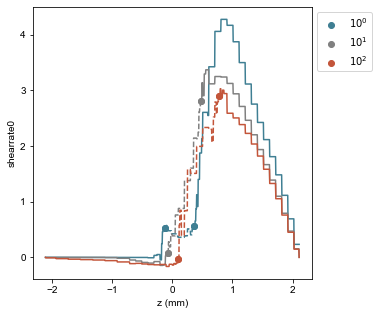

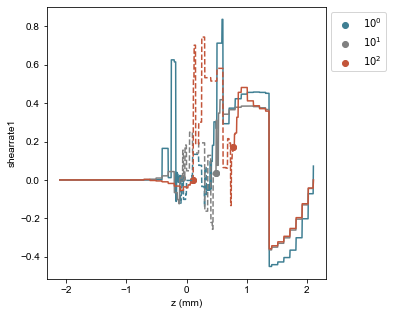

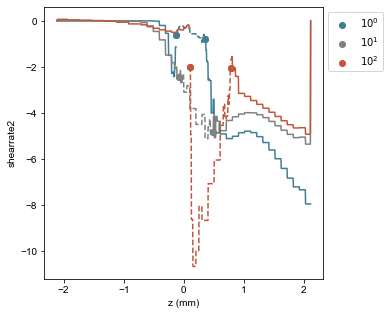

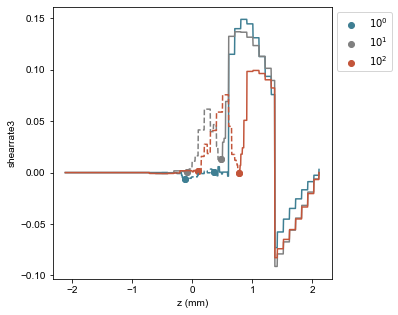

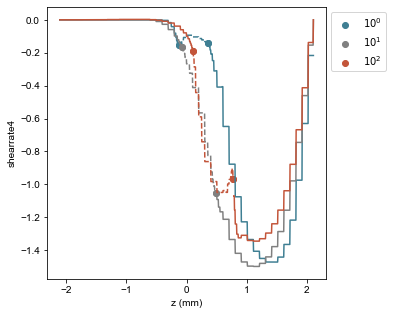

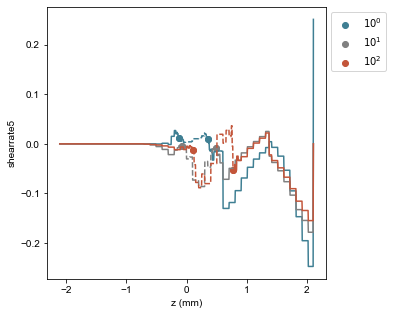

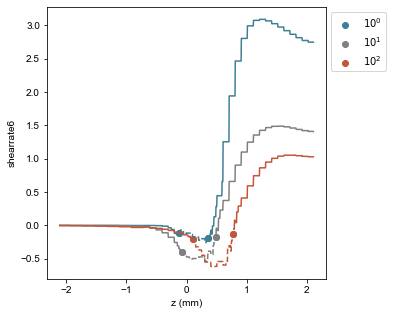

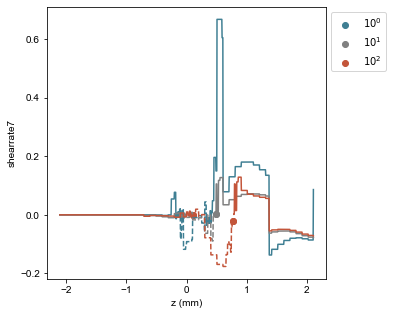

In [29]:
flist = []
for f in [1018, 1020, 1022]:
    flist.append(os.path.join(EFOLDERS[0], 'nb'+str(f)))
for mode in ['nu','vx','shearrate']+['shearrate'+str(i) for i in list(range(0,8))]:
    fig = linePlots(flist, lambda tp: tpFunc(tp, 'ksup'), 1, 5, mode, x=1.4)
#     fig.savefig(os.path.join(EXPORTFOLDER, 'k', r'k_velz_t_1_x_1.4_sig_0_'+str(mode)+'.svg'))